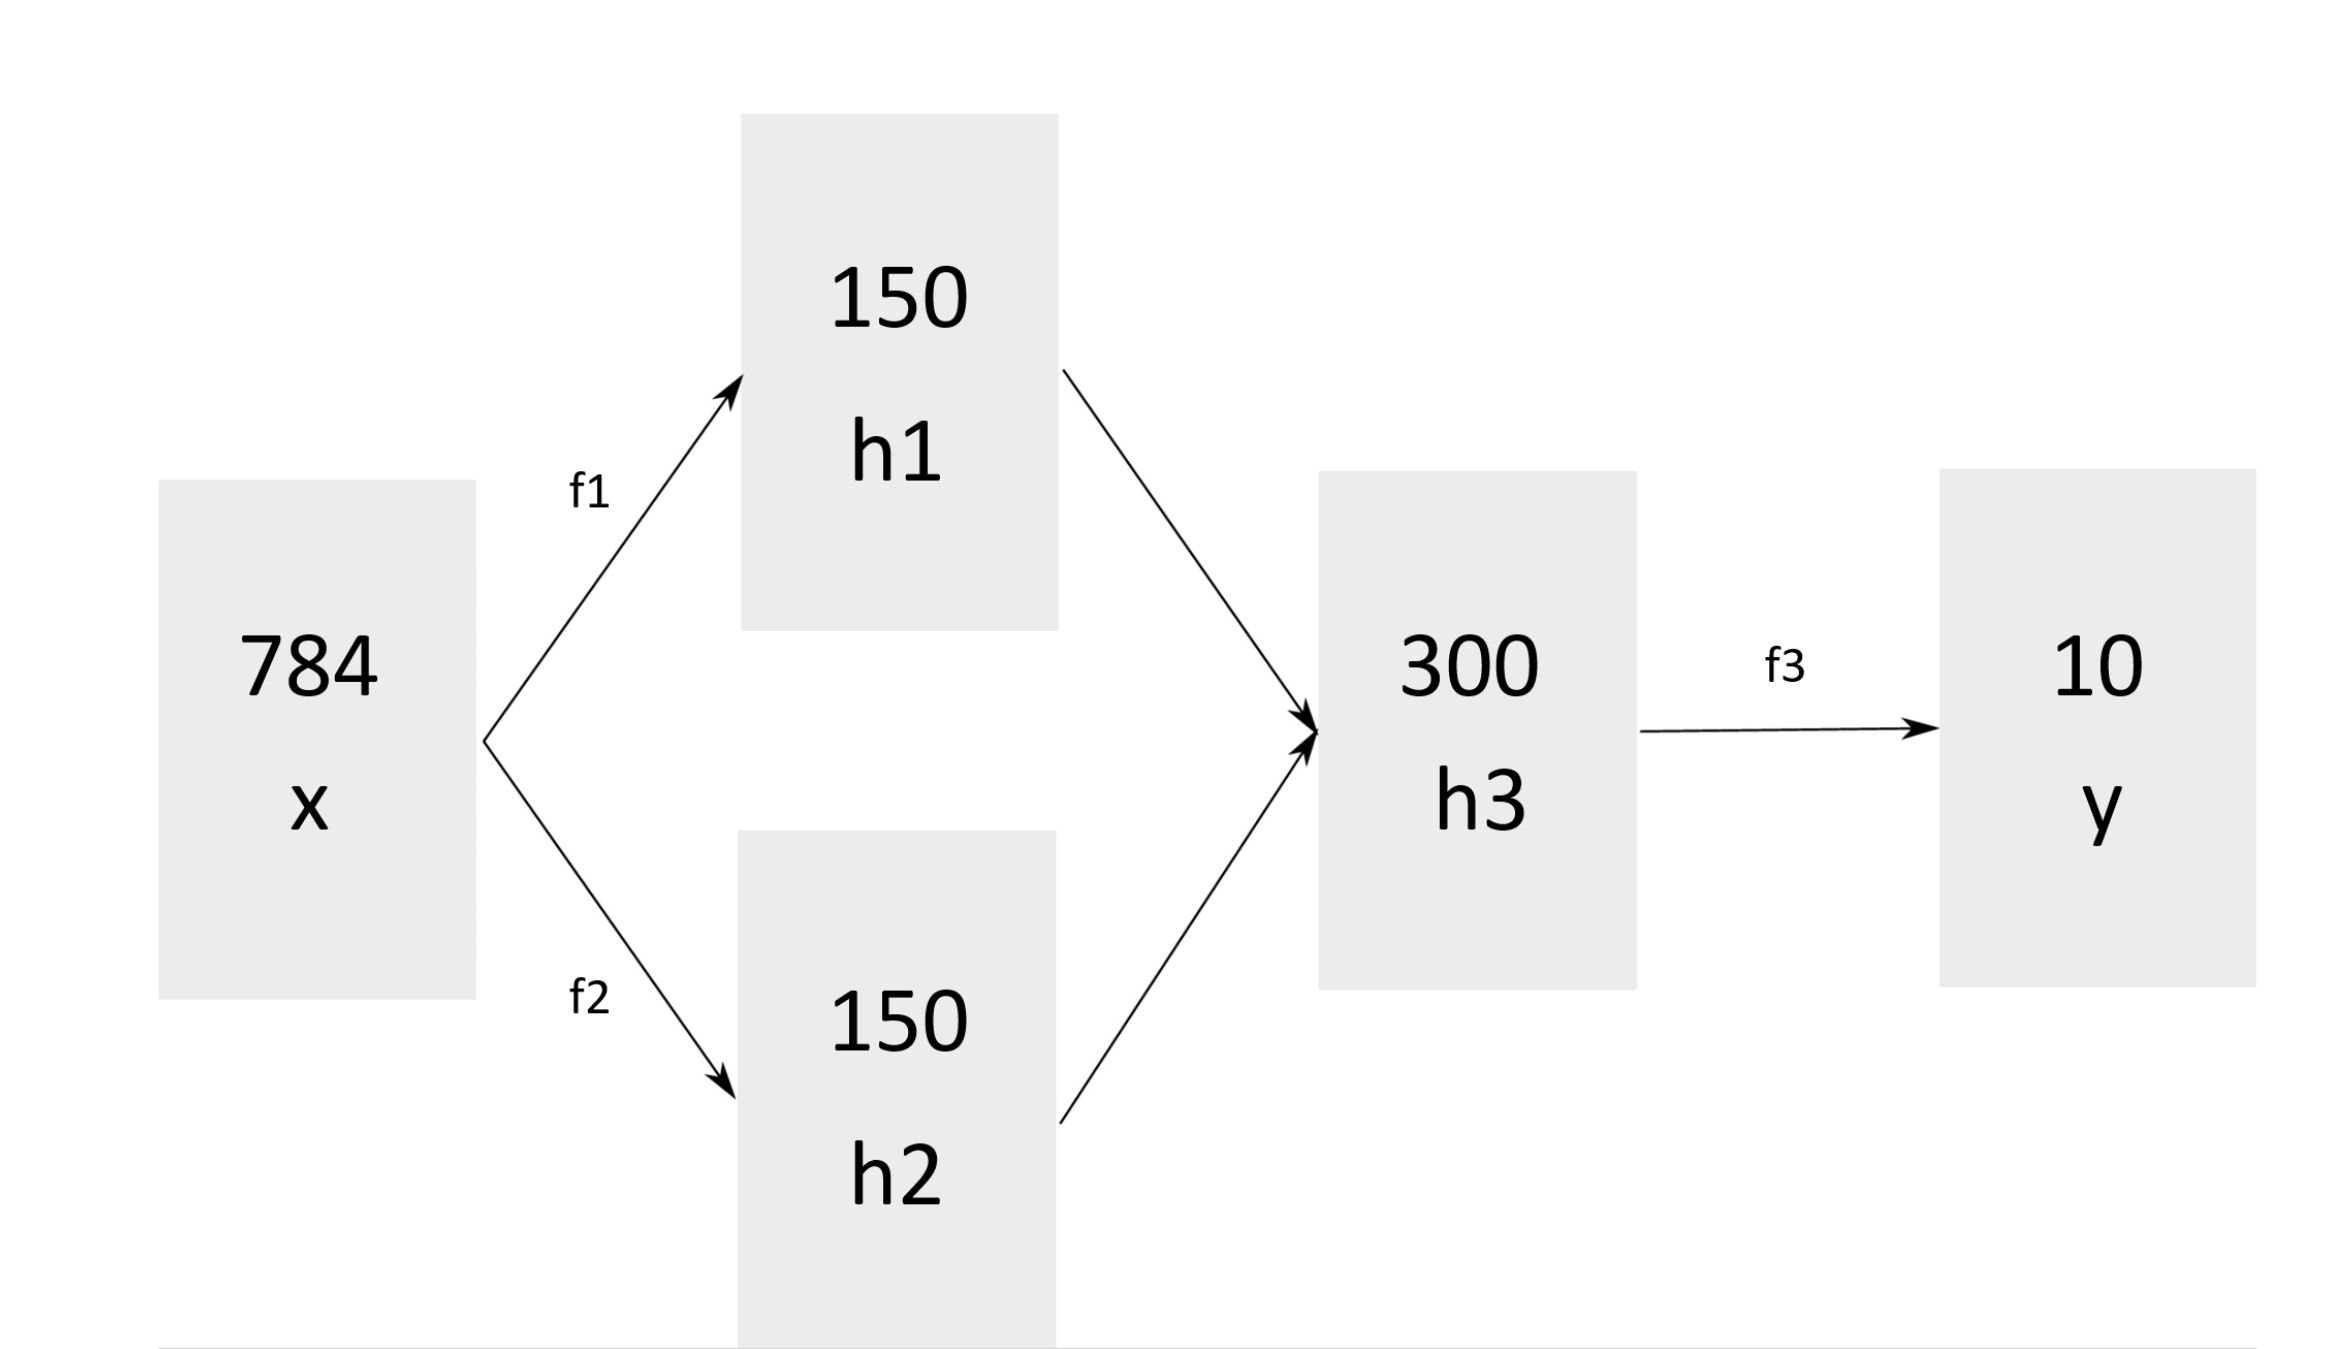

In [109]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [94]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [95]:
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Activation, Dense
from keras.layers import concatenate, add
from keras.optimizers import SGD

In [96]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [97]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [98]:
x_train-=x_train.min()
x_train=x_train/x_train.max()
x_test-=x_test.min()
x_test=x_test/x_test.max()

In [99]:
f1 = Dense(150, activation='sigmoid')
f2 = Dense(150, activation='sigmoid')
f3 = Dense(10, activation='softmax')

In [100]:
x = Input(shape=(784, ))

In [101]:
h1 = f1(x)
h2 = f2(x)
u = concatenate([h1, h2])
y = f3(u)

In [102]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 150)          117750      input_9[0][0]                    
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 150)          117750      input_9[0][0]                    
__________________________________________________________________________________________________
concatenate_9 (Concatenate)     (None, 300)          0           dense_35[0][0]                   
                                                                 dense_36[0][0]                   
__________

In [103]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.9),
             metrics=['accuracy'])

In [104]:
model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.5848 - acc: 0.8669 - val_loss: 0.2512 - val_acc: 0.9274
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.2174 - acc: 0.9361 - val_loss: 0.1829 - val_acc: 0.9455
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1622 - acc: 0.9522 - val_loss: 0.1448 - val_acc: 0.9582
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1289 - acc: 0.9627 - val_loss: 0.1211 - val_acc: 0.9635
Epoch 5/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.1079 - acc: 0.9687 - val_loss: 0.1147 - val_acc: 0.9648
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0924 - acc: 0.9734 - val_loss: 0.1005 - val_acc: 0.9696
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0806 - acc: 0.9767 - val_loss: 0.0955 - val_acc

In [107]:
score = model.evaluate(x_train, y_train, batch_size=100)
print('loss:', score[0])
print('accuracy:', score[1])

60000/60000 [==============================] - 1s 24us/step
loss: 0.020414135320849406
accuracy: 0.9959833371639252


In [108]:
score = model.evaluate(x_test, y_test, batch_size=100)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 0s 24us/step
loss: 0.06581348250998417
accuracy: 0.9798000055551529
